### Created by: Anthony D. Cho
### Last update: 12.11.2021

**Subject**: Classification (Support Vector Machine SVM) - Applied to Breast Cancer Coimbra


## Library dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

from pandas import read_csv
import matplotlib.pyplot as plt
from numpy import arange, linspace
from time import time
from scipy.stats import uniform

%matplotlib inline

## activacion del estilo de ambiente de graficación
#plt.style.use('dark_background')
plt.style.use('classic')

## Pipeline creator function
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import classification_report, plot_confusion_matrix

## Model
from sklearn.svm import SVC

## Cross-Validation function
from sklearn.model_selection import StratifiedShuffleSplit

## Random Search function
from sklearn.model_selection import RandomizedSearchCV

# Problem: Breast Cancer Coimbra

**Target**: Classification (0: No, 1: Yes)

## Data loading

Source: [Breast Cancer Coimbra](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)

In [2]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

## Feature names list
feature_names = data.columns[:-1]

In [3]:
## Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [4]:
## data description
data.describe(include='all')

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [5]:
## Display first five records
data.head(4)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1


In [6]:
## Display number of records per class
data.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

## Data pre-processing

In [7]:
## Predictors and target assignment
X = data.drop(columns=['Classification'])
y = data['Classification']

## Partition sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20200803)

## Data set normalization
scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## Display data shape
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (87, 9), y: (87,)
(test shape) X: (29, 9), y: (29,)


### SVM performance by kernel

In [8]:
## List of kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

## Compute SVC performance by kernel
for kernel in kernels:
    
    ## Display kernel name used for model fitting
    print('Kernel name: {}'.format(kernel))
    
    ## Model instance and fitting
    model = SVC(kernel=kernel).fit(X_train, y_train)
    
    ## Display the class labels
    print('Classes: {}'.format(model.classes_))
    
    ## Display the total number of support vectors of the fitted model
    print('Total number of support vectors: {}'.format(model.n_support_.sum()))
    
    ## Display the number of support vectors per class
    print('Number of support vectors per class: {}'.format(model.n_support_))
    
    ## Compute the model score with the training set
    print('Accuracy (Train): {:.4f}'.format(model.score(X_train, y_train)))
    
    ## Compute the model score with the test set
    print('Accuracy (Test):  {:.4f}\n'.format(model.score(X_test, y_test)))

Kernel name: linear
Classes: [1 2]
Total number of support vectors: 76
Number of support vectors per class: [38 38]
Accuracy (Train): 0.7931
Accuracy (Test):  0.6552

Kernel name: poly
Classes: [1 2]
Total number of support vectors: 50
Number of support vectors per class: [24 26]
Accuracy (Train): 0.8851
Accuracy (Test):  0.7241

Kernel name: rbf
Classes: [1 2]
Total number of support vectors: 71
Number of support vectors per class: [34 37]
Accuracy (Train): 0.8851
Accuracy (Test):  0.7586

Kernel name: sigmoid
Classes: [1 2]
Total number of support vectors: 76
Number of support vectors per class: [38 38]
Accuracy (Train): 0.5747
Accuracy (Test):  0.5517



### Searching best model using linear kernel

In [9]:
## Cross-validation instance
cvs = StratifiedShuffleSplit(n_splits=10, test_size=0.25)

## Parameter-space for searching
param = {'kernel': ['linear'],
         'C': uniform(1e-13, 100)}

## Best model estimation by random search
RS = RandomizedSearchCV(estimator=SVC(), 
                        param_distributions=param, 
                        n_iter=100, 
                        scoring='roc_auc', 
                        cv=cvs,
                        n_jobs=-1).fit(X_train, y_train)

## Display best model's hyperparameters
print('Best parameters value')
for hiperparam, valor in RS.best_params_.items():
    print('{}: {}'.format(hiperparam, valor))

Best parameters value
C: 80.10017923104309
kernel: linear


Accuracy (Train): 0.8046
Accuracy (Test):  0.6207

              precision    recall  f1-score   support

           1       0.55      0.50      0.52        12
           2       0.67      0.71      0.69        17

    accuracy                           0.62        29
   macro avg       0.61      0.60      0.60        29
weighted avg       0.62      0.62      0.62        29



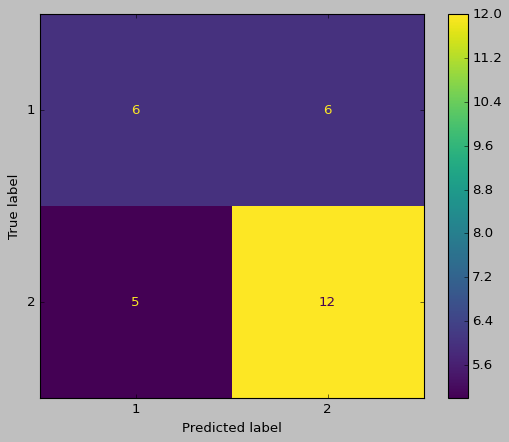

In [10]:
## Fitting a model with best parameters
model = SVC(**RS.best_params_).fit(X_train, y_train)

## Compute score using train set
print('Accuracy (Train): {:.4f}'.format(model.score(X_train, y_train)))

## Compute score using test set
print('Accuracy (Test):  {:.4f}\n'.format(model.score(X_test, y_test)))

## compute prediction
prediccion = model.predict(X_test)

## display classification report
print(classification_report(y_true=y_test, y_pred=prediccion))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test)
plt.show()

### Searching best model using Polynomial kernel

In [11]:
## Cross-validation instance
cvs = StratifiedShuffleSplit(n_splits=10, test_size=0.25)

## Parameter-space for searching
param = {'kernel': ['poly'],
         'C': uniform(1e-13, 100),
         'degree': arange(2, 10), 
         'gamma': linspace(1e-13, 5, 100)}

## Best model estimation by random search
RS = RandomizedSearchCV(estimator=SVC(), 
                        param_distributions=param, 
                        n_iter=100, 
                        scoring='roc_auc', 
                        cv=cvs,
                        n_jobs=-1).fit(X_train, y_train)

## Display best model's hyperparameters
print('Best parameters value')
for hiperparam, valor in RS.best_params_.items():
    print('{}: {}'.format(hiperparam, valor))

Best parameters value
C: 36.2524997413367
degree: 2
gamma: 0.3030303030303969
kernel: poly


Accuracy (Train): 0.8966
Accuracy (Test):  0.7241

              precision    recall  f1-score   support

           1       0.70      0.58      0.64        12
           2       0.74      0.82      0.78        17

    accuracy                           0.72        29
   macro avg       0.72      0.70      0.71        29
weighted avg       0.72      0.72      0.72        29



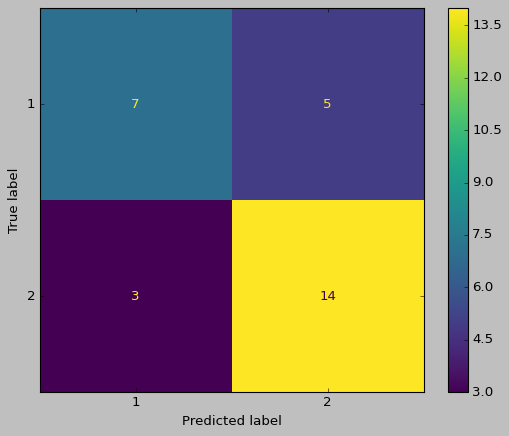

In [12]:
## Fitting a model with best parameters
model = SVC(**RS.best_params_).fit(X_train, y_train)

## Compute score using train set
print('Accuracy (Train): {:.4f}'.format(model.score(X_train, y_train)))

## Compute score using test set
print('Accuracy (Test):  {:.4f}\n'.format(model.score(X_test, y_test)))

## compute prediction
prediccion = model.predict(X_test)

## display classification report
print(classification_report(y_true=y_test, y_pred=prediccion))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test)
plt.show()

### Searching best model using radial kernel

In [13]:
## Cross-validation instance
cvs = StratifiedShuffleSplit(n_splits=10, test_size=0.25)

## Parameter-space for searching
param = {'kernel': ['rbf'],
         'C': uniform(1e-13, 100),
         'gamma': linspace(1e-13, 5, 100)}

## Best model estimation by random search
RS = RandomizedSearchCV(estimator=SVC(), 
                        param_distributions=param, 
                        n_iter=100, 
                        scoring='roc_auc', 
                        cv=cvs,
                        n_jobs=-1).fit(X_train, y_train)

## Display best model's hyperparameters
print('Best parameters value')
for hiperparam, valor in RS.best_params_.items():
    print('{}: {}'.format(hiperparam, valor))

Best parameters value
C: 68.13161227295072
gamma: 0.15151515151524847
kernel: rbf


Accuracy (Train): 0.9080
Accuracy (Test):  0.7586

              precision    recall  f1-score   support

           1       0.73      0.67      0.70        12
           2       0.78      0.82      0.80        17

    accuracy                           0.76        29
   macro avg       0.75      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29



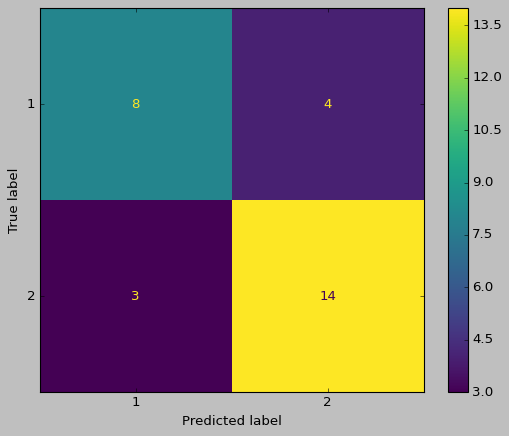

In [14]:
## Fitting a model with best parameters
model = SVC(**RS.best_params_).fit(X_train, y_train)

## Compute score using train set
print('Accuracy (Train): {:.4f}'.format(model.score(X_train, y_train)))

## Compute score using test set
print('Accuracy (Test):  {:.4f}\n'.format(model.score(X_test, y_test)))

## compute prediction
prediccion = model.predict(X_test)

## display classification report
print(classification_report(y_true=y_test, y_pred=prediccion))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test)
plt.show()

### Mejor ajuste del modelo usando kernel sigmoidal

In [15]:
## Cross-validation instance
cvs = StratifiedShuffleSplit(n_splits=10, test_size=0.25)

## Parameter-space for searching
param = {'kernel': ['sigmoid'],
         'C': uniform(1e-13, 100),
         'gamma': linspace(1e-13, 5, 100)}

## Best model estimation by random search
RS = RandomizedSearchCV(estimator=SVC(), 
                        param_distributions=param, 
                        n_iter=100, 
                        scoring='roc_auc', 
                        cv=cvs,
                        n_jobs=-1).fit(X_train, y_train)

## Display best model's hyperparameters
print('Best parameters value')
for hiperparam, valor in RS.best_params_.items():
    print('{}: {}'.format(hiperparam, valor))

Best parameters value
C: 71.41833522203689
gamma: 0.20202020202029797
kernel: sigmoid


Accuracy (Train): 0.7931
Accuracy (Test):  0.5862

              precision    recall  f1-score   support

           1       0.50      0.50      0.50        12
           2       0.65      0.65      0.65        17

    accuracy                           0.59        29
   macro avg       0.57      0.57      0.57        29
weighted avg       0.59      0.59      0.59        29



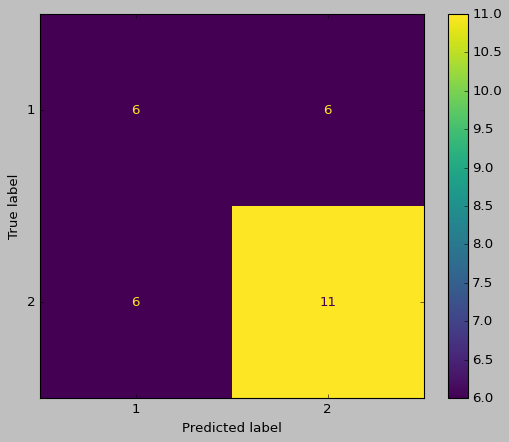

In [16]:
## Fitting a model with best parameters
model = SVC(**RS.best_params_).fit(X_train, y_train)

## Compute score using train set
print('Accuracy (Train): {:.4f}'.format(model.score(X_train, y_train)))

## Compute score using test set
print('Accuracy (Test):  {:.4f}\n'.format(model.score(X_test, y_test)))

## compute prediction
prediccion = model.predict(X_test)

## display classification report
print(classification_report(y_true=y_test, y_pred=prediccion))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test)
plt.show()

## Pipeline

In [17]:
## Data pre-processing
X = data.drop(columns=['Classification'])
y = data['Classification']

## Partition set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20200803)

In [18]:
## Pipeline instance
pipe = make_pipeline(MinMaxScaler(), SVC())

In [19]:
## Pipeline-model fitting
pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

Accuracy (Train): 0.8851
Accuracy (Test):  0.7586

              precision    recall  f1-score   support

           1       0.73      0.67      0.70        12
           2       0.78      0.82      0.80        17

    accuracy                           0.76        29
   macro avg       0.75      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29



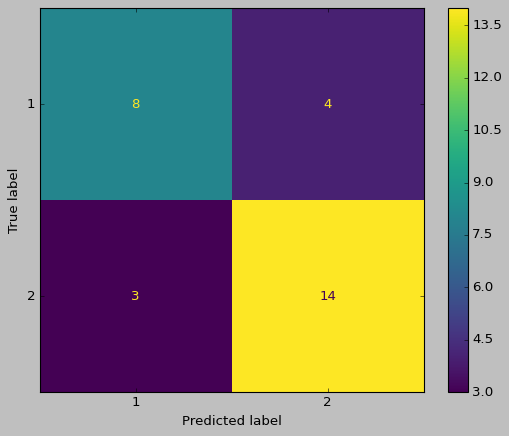

In [20]:
## Compute score using train set
print('Accuracy (Train): {:.4f}'.format(pipe.score(X_train, y_train)))

## Compute score using test set
print('Accuracy (Test):  {:.4f}\n'.format(pipe.score(X_test, y_test)))

## Compute prediction
prediccion = pipe.predict(X_test)

## display classification report
print(classification_report(y_true=y_test, y_pred=prediccion))

## Display confusion matrix
plot_confusion_matrix(estimator=pipe, X=X_test, y_true=y_test)
plt.show()